In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
df = pd.read_csv('winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [58]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [59]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [61]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [62]:
print("before skew:")
skew_vals = df.drop('quality', axis=1).skew()
print(skew_vals)

before skew:
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64


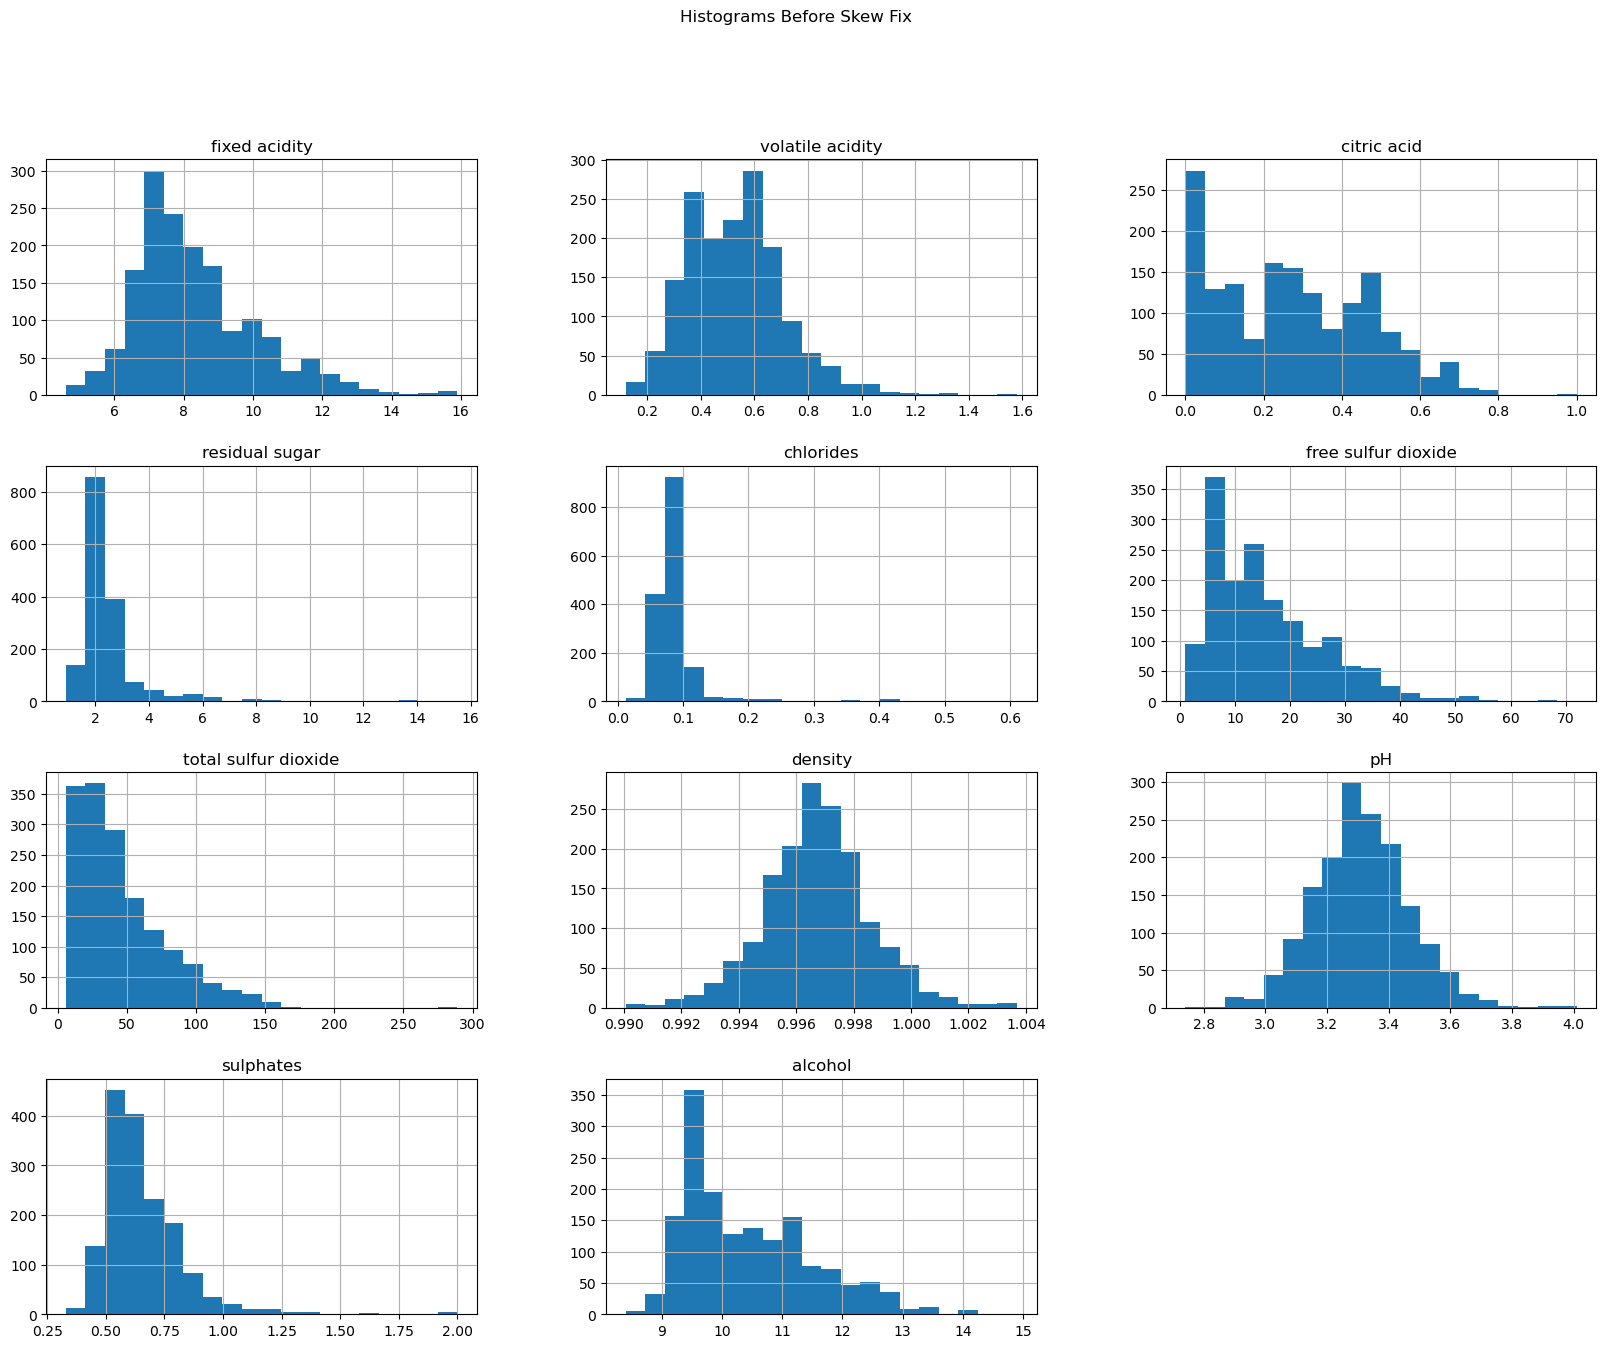

In [63]:
df.drop('quality', axis=1).hist(figsize=(20,15), bins=20)
plt.suptitle('Histograms Before Skew Fix')
plt.show()


In [64]:
pt = PowerTransformer(method='yeo-johnson')
X_features = df.drop('quality', axis=1)
X_fixed = pt.fit_transform(X_features)
df_fixed = pd.DataFrame(X_fixed, columns=X_features.columns)
df_fixed['quality'] = df['quality'].values

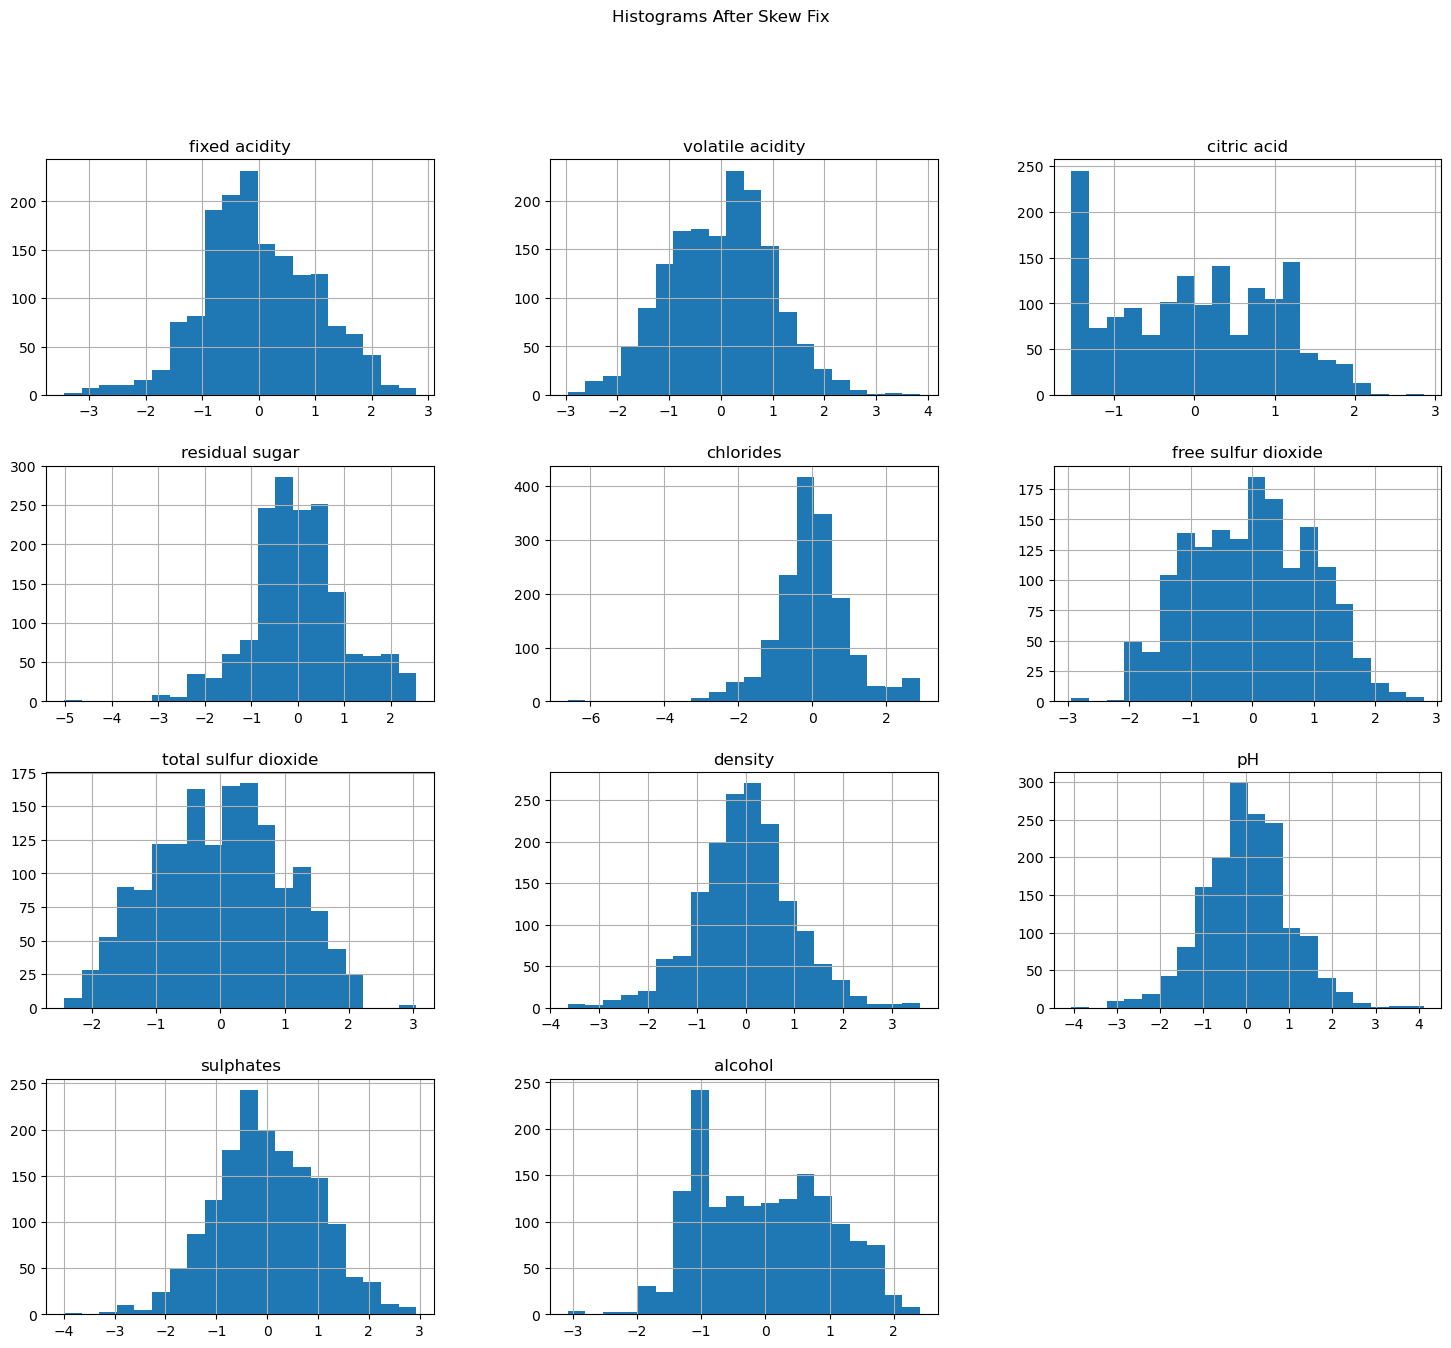

In [65]:
df_fixed.drop('quality', axis=1).hist(figsize=(18,15), bins=20)
plt.suptitle('Histograms After Skew Fix')
plt.show()

In [66]:
def outlier_summary_iqr(df, features):
    outlier_count = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_mask = (df[col] < lower) | (df[col] > upper)
        outlier_count[col] = outlier_mask.sum()
    return pd.Series(outlier_count)

print("outliers before:")
features = df_fixed.columns.drop('quality')
print(outlier_summary_iqr(df_fixed, features))

outliers before:
fixed acidity            18
volatile acidity          7
citric acid               0
residual sugar           41
chlorides               118
free sulfur dioxide       0
total sulfur dioxide      2
density                  45
pH                       37
sulphates                13
alcohol                   0
dtype: int64


In [67]:
def remove_outliers_iqr(df, features):
    df_clean = df.copy()
    for col in features:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_clean = remove_outliers_iqr(df_fixed, features)
print("outliers after:")
print(outlier_summary_iqr(df_clean, features))


outliers after:
fixed acidity           2
volatile acidity        2
citric acid             0
residual sugar          0
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 7
pH                      0
sulphates               0
alcohol                 0
dtype: int64


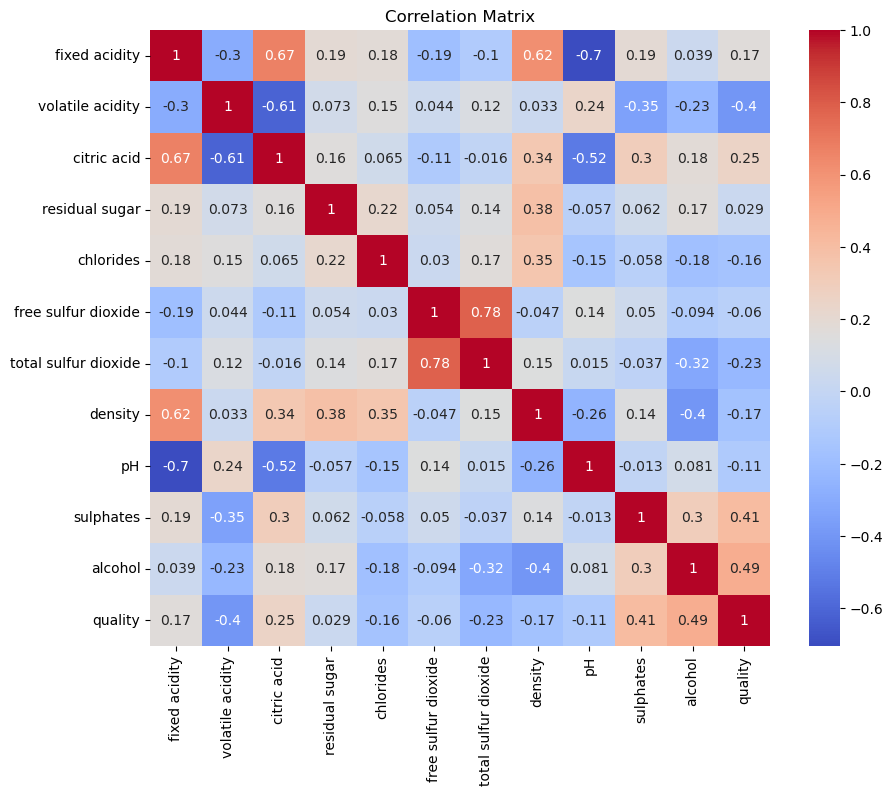

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [69]:
X = df_clean.drop('quality', axis=1)
y = df_clean['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
pca_full = PCA()
pca_full.fit(X_train_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


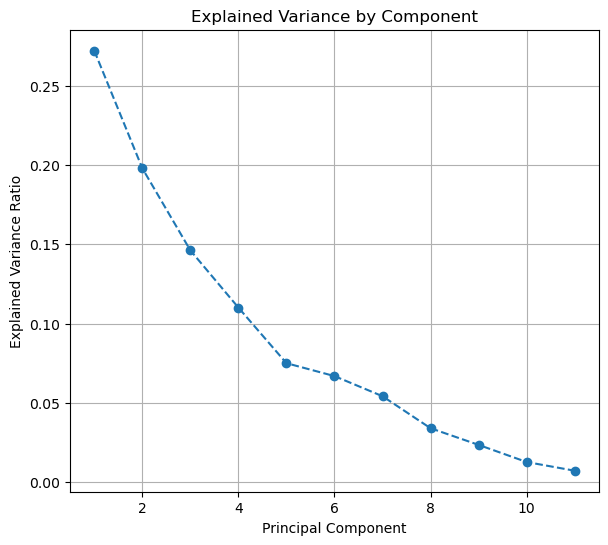

In [72]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_, 
         marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True)

In [74]:
n_components = 5
pca_five = PCA(n_components=n_components)
X_train_pca_five = pca_five.fit_transform(X_train_scaled)
df_pca_five = pd.DataFrame(X_train_pca_five, columns=[f'PC_{i+1}' for i in range(n_components)])
print(df_pca_five.columns.tolist()) 


['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5']


In [75]:
df_pca_five


,PC_1,PC_2,PC_3,PC_4,PC_5
0,0.796636,2.943516,0.341935,1.454385,0.807354
1,-1.114726,-1.359327,-2.717092,-1.889446,-0.969599
2,-0.310053,1.736111,-0.974439,0.533546,-0.056102
3,-2.879191,0.008109,0.987444,-0.774921,0.079295
4,-0.843936,-0.704260,2.587551,0.479454,1.131237
...,...,...,...,...,...
1091,-1.239389,-0.056400,1.410802,-0.478014,-0.161945
1092,0.532177,-2.965159,0.238461,-1.461654,-1.673900
1093,-2.140620,-0.760691,1.808099,-0.146007,0.537148
1094,0.919466,-2.421390,1.625487,-0.207616,-0.137582


In [76]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled) 

total_var = pca.explained_variance_ratio_.sum() * 100
print(f"Total explained variance {pca.n_components} components: {total_var:.2f}")

Total explained variance 5 components: 80.11


In [77]:
columns = [f'PC_{i+1}' for i in range(n_components)]

variance_ratios = pd.DataFrame(
    pca.explained_variance_ratio_.reshape(1, n_components),
    columns=columns,
    index=['Explained Variance Ratio']
)
print(variance_ratios)

                             PC_1      PC_2      PC_3      PC_4      PC_5
Explained Variance Ratio  0.27197  0.197876  0.146138  0.110088  0.075059


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6240875912408759
Confusion Matrix:
 [[ 0  1  1  1  0  0]
 [ 0  1  3  4  0  0]
 [ 0  0 84 28  1  0]
 [ 0  0 40 66  6  0]
 [ 0  0  2 13 20  0]
 [ 0  0  0  3  0  0]]


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6715328467153284
Confusion Matrix:
 [[ 0  0  3  0  0  0]
 [ 0  0  5  3  0  0]
 [ 0  0 90 22  1  0]
 [ 0  0 31 76  5  0]
 [ 0  0  1 17 17  0]
 [ 0  0  0  2  0  1]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.69      0.80      0.74       113
           6       0.63      0.68      0.66       112
           7       0.74      0.49      0.59        35
           8       1.00      0.33      0.50         3

    accuracy                           0.67       274
   macro avg       0.51      0.38      0.41       274
weighted avg       0.65      0.67      0.65       274



c:\Users\ruthr\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ruthr\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ruthr\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

In [82]:
import joblib
joblib.dump(pt, 'power_transformer.pkl')

joblib.dump(scaler, 'scaler.pkl')

joblib.dump(pca, 'pca_5_components.pkl')

joblib.dump(model, 'logistic_regression_model.pkl')

joblib.dump(model_rf, 'random_forest_model.pkl')



['random_forest_model.pkl']